<a href="https://colab.research.google.com/github/Angelgz011/estadistica2/blob/main/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficiente de correlación: -0.8801

Con un coeficiente de correlación de -0.8801 se puede decir que los datos teinen un nivel de correlación fuerte 

El coeficiente  de determinación es: 0.7746, lo que nos indica que el 77.46% de la variabilidad de Y
 tienen una relación con los valores de X
Coeficiente de determinación:  0.7746

Intervalo de confianza para b1 de  95%
-3.9625 < b1 < -1.9549



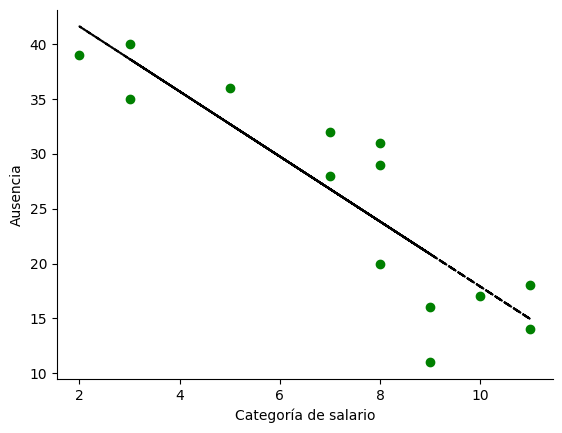

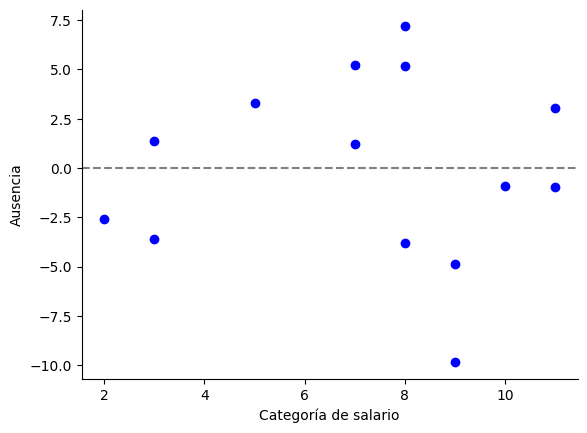

valor-p para shapiro:  0.8933

valor_p de Breush - pagan:  0.4505

Para x = 6, el valor interpolado de  y =  29.7355

Para x = 10, el valor interpolado de  y =  17.9008

Para x = 15, el valor extrapolado de  y =  3.1074

Tabla Anova:              df      sum_sq     mean_sq          F    PR(>F)
x          1.0  983.548996  983.548996  41.243954  0.000033
Residual  12.0  286.165289   23.847107        NaN       NaN
En esta tabla encontramos un valo-p muy por debajo de 0.5, que es 0.000033,
 por lo que podemos decir que el salario sí esta fuertemente relacionado con las ausencias. 


In [ ]:
import numpy as np
x = np.array([11,10,8,5,9,7,3,11,8,7,2,9,8,3]) #Categoría de salario
y = np.array([18,17,29,36,11,28,35,14,20,32,39,16,31,40]) #Ausencias

#Realizar un diagrama de disperción
import matplotlib.pyplot as plt
plt.scatter(x, y, color = 'green')
plt.xlabel('Categoría de salario') # nombrar eje x
plt.ylabel('Ausencia') # nombrar eje y
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#3.-Por lo que se puede observar en la gráfica, los datos sí siguen una tendencia lineal, sin embargo no se puede apreciar completametne una linealidad perfecta.

#4.- Calcular el coeficiente de correlación
from scipy.stats import pearsonr
r,_= pearsonr(x,y)
print(f'Coeficiente de correlación: {r:0.4f}\n')
print(f"Con un coeficiente de correlación de {r:0.4f} se puede decir que los datos tienen un nivel de correlación fuerte \n")

#5.- Calcular el coeficiente de determinación
print(f"El coeficiente  de determinación es: {r**2:0.4f}, lo que nos indica que el 77.46% de la variabilidad de Y\n tienen una relación con los valores de X")

#6.- Obtener la recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
b0, b1 = modelo.params
fun = lambda x: b0 + b1 * x
Yc = fun(x)
plt.plot(x, Yc, color = 'black', linestyle = '--')
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')


#7.- Obtener un intervalo de confianza del 95%
import pandas as pd

nivel_de_confianza = 0.95
intervalo_de_confianza = pd.DataFrame(modelo.conf_int(alpha = 1 - nivel_de_confianza))
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f"Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}")
print(f"{intervalo_de_confianza_b1[0]:0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n")

#8.- Calcular los residuales y trasar un nuevo gráfico de disperción
plt.figure()
residuales = y - Yc
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('Categoría de salario')
plt.ylabel('Ausencia')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.show()

#9.- PRUEBA DE SHAPIRO PARA LOS RESIDUALES
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p para shapiro: {valor_p_sh: 0.4f}\n')

#10.- Prueba de brausch-Pagan

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan( residuales, x_constante)
print(f"valor_p de Breush - pagan: {valor_p_bp: 0.4f}\n")

#11.-  Interpolar y extrapolar usando la recta de regresión
b0, b1 = modelo.params
x_interpolado1 = 6
y_interpolado1 = b0 + b1 *x_interpolado1
print(f'Para x = {x_interpolado1}, el valor interpolado de  y = {y_interpolado1: 0.4f}\n')

x_interpolado2 = 10
y_interpolado2 = b0 + b1 *x_interpolado2
print(f'Para x = {x_interpolado2}, el valor interpolado de  y = {y_interpolado2: 0.4f}\n')

x_extrapolado = 15
y_extrapolado = b0 + b1 *x_extrapolado
print(f'Para x = {x_extrapolado}, el valor extrapolado de  y = {y_extrapolado: 0.4f}\n')

#12.- TABLA ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.DataFrame({'x': x, 'y': y})

modelo_formula = smf.ols(formula = 'y ~ x', data = df).fit()

anova = sm.stats.anova_lm(modelo_formula)
print("Tabla Anova: ", anova)
print("En esta tabla encontramos un valo-p muy por debajo de 0.5, que es 0.000033,\n por lo que podemos decir que el salario sí esta fuertemente relacionado con las ausencias. ")

